In [1]:
pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Veri Kurulumu ve Kütüphaneler

In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1) # normalize işlemi 0 ile 255 arasındaki verile 0 ve 1 arasına sıkıştırıyor
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # en sonda sınıflandıracağımız sınıf adedi kaç ise dense kısmına o kadar ekliyoruz
                                                                 # bu çalışmada elimizde 10 adet rakam olduğu için en sona 10 yazdık               

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy']) 

model.fit(x_train, y_train, epochs=3)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2641 - accuracy: 0.9225
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1088 - accuracy: 0.9656
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0732 - accuracy: 0.9765


In [3]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0993 - accuracy: 0.9691
0.09927660971879959 0.9690999984741211


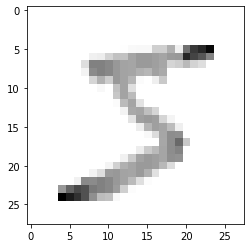

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [5]:
model.save('numara_okuyucu')

In [6]:
new_model = tf.keras.models.load_model('numara_okuyucu')

In [7]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [8]:
import numpy as np

print(np.argmax(predictions[0]))

7


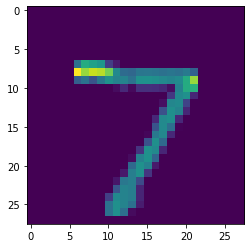

In [9]:
plt.imshow(x_test[0])
plt.show()

In [13]:
print(np.argmax(predictions[6]))

4


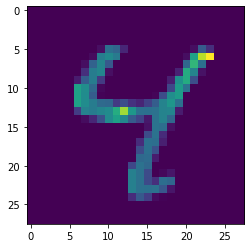

In [14]:
plt.imshow(x_test[6])
plt.show()